## Final Project Submission


* Student name: Meaghan Ross
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Max Barry & Uohna Thiessen
* Blog post URL: 


In [1]:
# import python libraries
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# open the first data file
title_basics = pd.read_csv('Data/imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
# open the second data file
title_ratings = pd.read_csv('Data/imdb.title.ratings.csv.gz')
title_ratings.head()
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# Movie Budgets

In [5]:
# open the third data file
movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
# change release date to date-time
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

# change production_budget, domestic_gross, and worldwide_budget to integers
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [7]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [8]:
# add a profit column to movie_budgets
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [9]:
# drop id column
movie_budgets.drop(columns = ["id"], inplace=True)

In [10]:
movie_budgets.sort_values(by='release_date', ascending = False)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
194,2020-12-31,Moonfall,150000000.0,0.0,0.0,-150000000.0
1205,2020-12-31,Hannibal the Conqueror,50000000.0,0.0,0.0,-50000000.0
535,2020-02-21,Call of the Wild,82000000.0,0.0,0.0,-82000000.0
480,2019-12-31,Army of the Dead,90000000.0,0.0,0.0,-90000000.0
3515,2019-12-31,Eli,11000000.0,0.0,0.0,-11000000.0
...,...,...,...,...,...,...
5606,1925-11-19,The Big Parade,245000.0,11000000.0,22000000.0,21755000.0
5683,1920-09-17,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0,2900000.0
5614,1916-12-24,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0,7800000.0
5523,1916-09-05,Intolerance,385907.0,0.0,0.0,-385907.0


# Merging Data Tables

In [11]:
# merge title_basics and title_ratings on tconst
imdb_data = pd.merge(title_basics, title_ratings, how = 'inner', on = 'tconst')
imdb_data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [12]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [13]:
# rename columns for merging
imdb_data.rename(columns = {'primary_title':'movie'}, inplace = True)

In [14]:
imdb_data.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [15]:
# separate genres into lists
imdb_data["genres"] = imdb_data["genres"].apply(lambda x: x.split(",") if type(x) == str else x)
imdb_data.head()

,tconst,movie,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119


In [25]:
exploded_genres = imdb_data.explode('genres')
exploded_genres

,movie,genres,averagerating,numvotes
0,Sunghursh,Action,7.0,77
0,Sunghursh,Crime,7.0,77
0,Sunghursh,Drama,7.0,77
1,One Day Before the Rainy Season,Biography,7.2,43
1,One Day Before the Rainy Season,Drama,7.2,43
...,...,...,...,...
73852,Sokagin Çocuklari,Drama,8.7,136
73852,Sokagin Çocuklari,Family,8.7,136
73853,Albatross,Documentary,8.5,8
73854,La vida sense la Sara Amat,NaN,6.6,5


In [16]:
# drop columns not being used for analysis
imdb_data.drop(columns = ["tconst", "original_title", "start_year","runtime_minutes"], inplace=True)

In [17]:
imdb_data.isna().sum()

movie              0
genres           804
averagerating      0
numvotes           0
dtype: int64

In [18]:
imdb_clean = imdb_data.drop_duplicates(subset='movie')

In [19]:
imdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69993 entries, 0 to 73854
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie          69993 non-null  object 
 1   genres         69222 non-null  object 
 2   averagerating  69993 non-null  float64
 3   numvotes       69993 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [20]:
movies_data = pd.merge(imdb_clean, movie_budgets, how = 'inner', on = 'movie')
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 0 to 2183
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              2184 non-null   object        
 1   genres             2182 non-null   object        
 2   averagerating      2184 non-null   float64       
 3   numvotes           2184 non-null   int64         
 4   release_date       2184 non-null   datetime64[ns]
 5   production_budget  2184 non-null   float64       
 6   domestic_gross     2184 non-null   float64       
 7   worldwide_gross    2184 non-null   float64       
 8   profit             2184 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 170.6+ KB


In [21]:
movies_data.head()

,movie,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profit
0,Foodfight!,"[Action, Animation, Comedy]",1.9,8248,2012-12-31,45000000.0,0.0,73706.0,-44926294.0
1,The Overnight,NaN,7.5,24,2015-06-19,200000.0,1109808.0,1165996.0,965996.0
2,On the Road,"[Adventure, Drama, Romance]",6.1,37886,2013-03-22,25000000.0,720828.0,9313302.0,-15686698.0
3,The Secret Life of Walter Mitty,"[Adventure, Comedy, Drama]",7.3,275300,2013-12-25,91000000.0,58236838.0,187861183.0,96861183.0
4,A Walk Among the Tombstones,"[Action, Crime, Drama]",6.5,105116,2014-09-19,28000000.0,26017685.0,62108587.0,34108587.0


In [22]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 0 to 2183
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              2184 non-null   object        
 1   genres             2182 non-null   object        
 2   averagerating      2184 non-null   float64       
 3   numvotes           2184 non-null   int64         
 4   release_date       2184 non-null   datetime64[ns]
 5   production_budget  2184 non-null   float64       
 6   domestic_gross     2184 non-null   float64       
 7   worldwide_gross    2184 non-null   float64       
 8   profit             2184 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 170.6+ KB


# Question 3

How does the amount of movie invested into the movie (aka budget) impact the profit?

2.1269433806033087


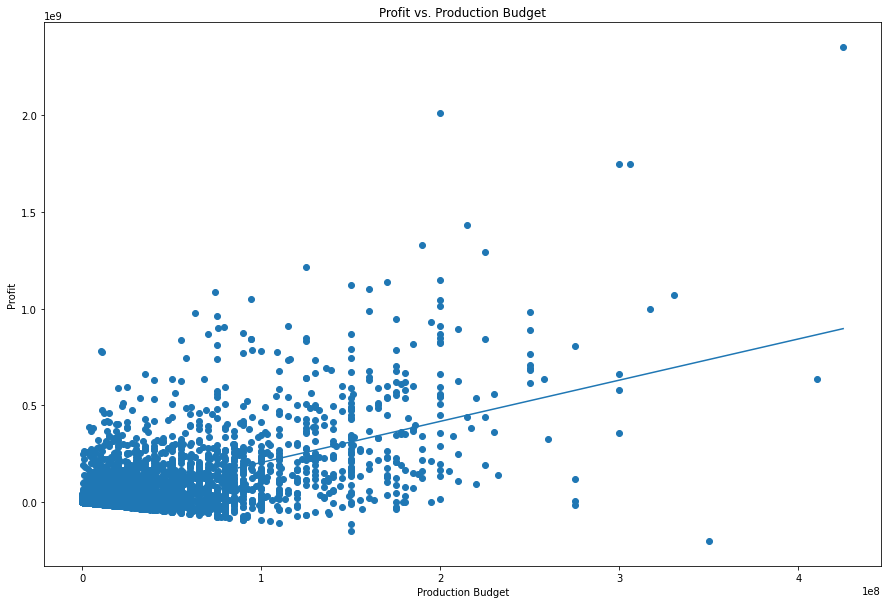

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

m, b = np.polyfit(movie_budgets['production_budget'], movie_budgets['profit'], 1)
plt.plot(movie_budgets['production_budget'], m*movie_budgets['production_budget']+b)

ax.scatter(movie_budgets['production_budget'], movie_budgets['profit'])
ax.set_title('Profit vs. Production Budget')
ax.set_xlabel('Production Budget')
ax.set_ylabel('Profit')
print(m);

/Users/meaghanross/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


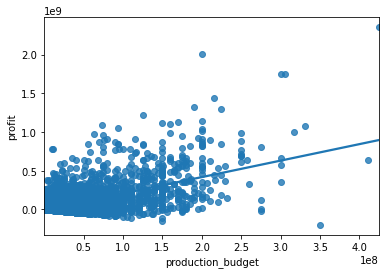

In [24]:
sns.regplot(movie_budgets['production_budget'], movie_budgets['profit'], ci=None);